<a href="https://colab.research.google.com/github/pranit06/Deep_Learning/blob/main/DL_Exp2_7_11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks

import keras
from keras import datasets, models, layers, utils, preprocessing
from keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import os

import matplotlib.pyplot as plt
from matplotlib import style

#Importing Dataset

In [ ]:
mnist= datasets.mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()

#Pre-Processing

##Data

Viewing Data

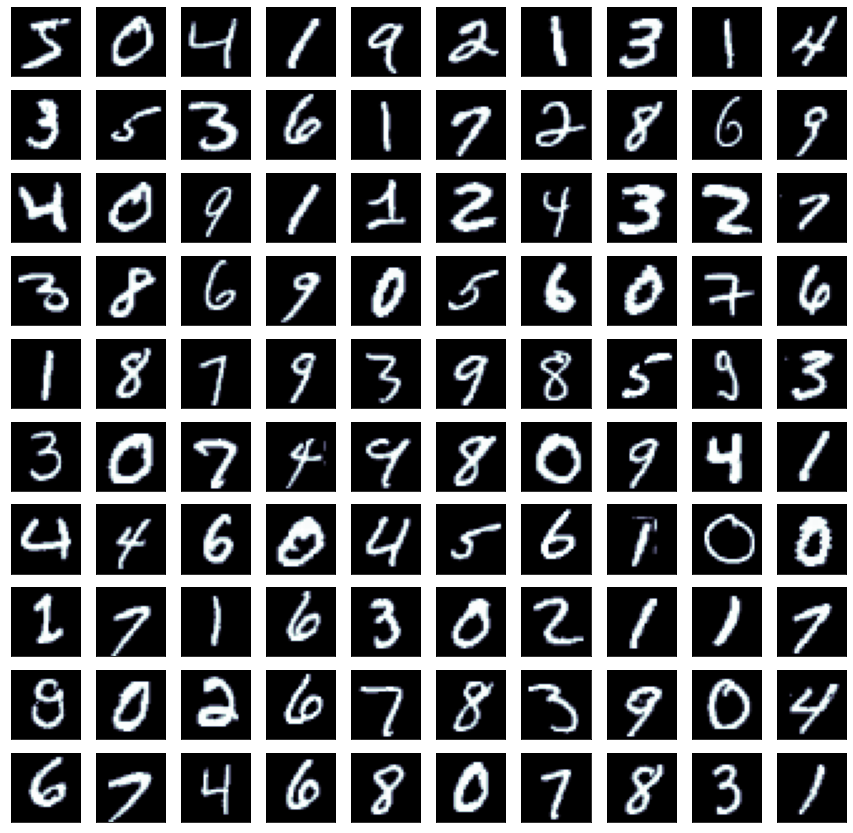

In [ ]:
fig = plt.figure(figsize = (15, 15))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.bone)

Scaling

In [ ]:
x_train= np.array(x_train)
x_test= np.array(x_test)
x_train= x_train/255
x_test= x_test/255
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


Reshaping

In [ ]:
x_train= x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test= x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


##Labels

Encoding the labels

In [ ]:
le= LabelEncoder()

In [ ]:
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

Converting to Categorical

In [ ]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

##Image Data Generator

Setting the Parameters

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center= False,
        samplewise_center= False,
        featurewise_std_normalization= False,
        samplewise_std_normalization= False,
        zca_whitening= False,
        rotation_range= 0.5,
        zoom_range= 0.01,
        width_shift_range= 0.01,
        height_shift_range= 0.01,
        horizontal_flip= False,
        vertical_flip= False,
        validation_split= 0.2)

Defining Train and Validation sets

In [ ]:
train= datagen.flow(x_train, y_train, batch_size= 50, seed= 10, subset= 'training')
validation= datagen.flow(x_train, y_train, batch_size= 50, seed= 10, subset= 'validation')

#Building the Convolutional Neural Network

Initializing the Model

In [ ]:
cnn= models.Sequential()

Building the Layers

In [ ]:
cnn.add(Conv2D(64, (3, 3), input_shape= (28, 28, 1)))
cnn.add(LeakyReLU(alpha= 0.1))
cnn.add(MaxPool2D((2, 2)))

cnn.add(Conv2D(128, (2, 2)))
cnn.add(LeakyReLU(alpha= 0.1))
cnn.add(MaxPool2D((2, 2)))

cnn.add(Conv2D(256, (2, 2)))
cnn.add(LeakyReLU(alpha= 0.1))
cnn.add(MaxPool2D((2, 2)))

cnn.add(Flatten())

cnn.add(Dense(128, activation= 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation= 'softmax'))

Compiling the Model

In [ ]:
cnn.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

Defining Callbacks

In [ ]:
es= callbacks.EarlyStopping(monitor= 'accuracy', min_delta= 0.01, patience= 10, mode= 'max', restore_best_weights= True)

Training the Model

In [ ]:
history= cnn.fit(train, validation_data= validation, steps_per_epoch= 100, validation_steps= 20, epochs= 100, callbacks= [es])

Epoch 1/100
100/100 [==============================] - 12s 119ms/step - loss: 1.1633 - accuracy: 0.6038 - val_loss: 0.2591 - val_accuracy: 0.9290
Epoch 2/100
100/100 [==============================] - 12s 117ms/step - loss: 0.3787 - accuracy: 0.8876 - val_loss: 0.1683 - val_accuracy: 0.9450
Epoch 3/100
100/100 [==============================] - 12s 117ms/step - loss: 0.2670 - accuracy: 0.9158 - val_loss: 0.1183 - val_accuracy: 0.9660
Epoch 4/100
100/100 [==============================] - 12s 117ms/step - loss: 0.2289 - accuracy: 0.9332 - val_loss: 0.1025 - val_accuracy: 0.9690
Epoch 5/100
100/100 [==============================] - 12s 118ms/step - loss: 0.1782 - accuracy: 0.9500 - val_loss: 0.1079 - val_accuracy: 0.9670
Epoch 6/100
100/100 [==============================] - 12s 117ms/step - loss: 0.1496 - accuracy: 0.9552 - val_loss: 0.0897 - val_accuracy: 0.9660
Epoch 7/100
100/100 [==============================] - 12s 119ms/step - loss: 0.1424 - accuracy: 0.9608 - val_loss: 0.0866 -

Loss Graph

<function matplotlib.pyplot.show>

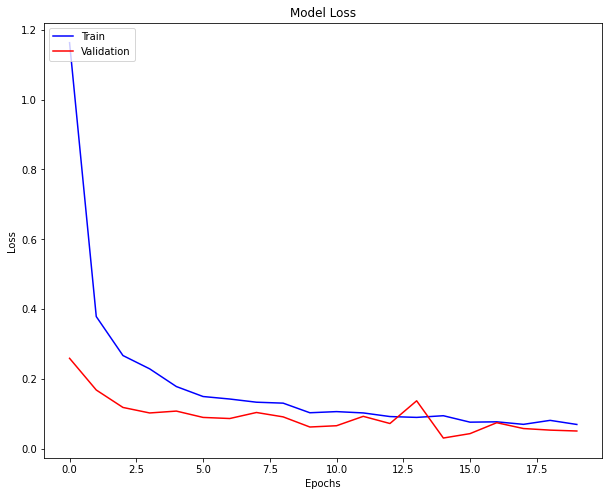

In [ ]:
plt.figure(figsize= (10, 8))
plt.plot(history.history['loss'], color= 'blue')
plt.plot(history.history['val_loss'], color= 'red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.show

Accuracy Graph

<function matplotlib.pyplot.show>

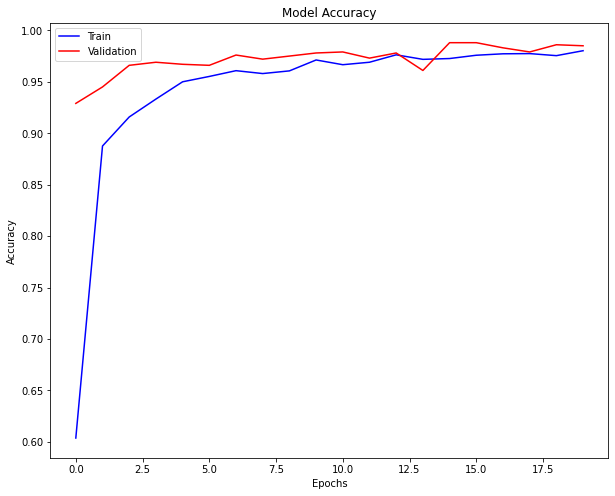

In [ ]:
plt.figure(figsize= (10, 8))
plt.plot(history.history['accuracy'], color= 'blue')
plt.plot(history.history['val_accuracy'], color= 'red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.show

Testing the Model

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 21ms/step - loss: 0.0565 - accuracy: 0.9820


[0.05653510242700577, 0.9819999933242798]

Saving the Model

In [ ]:
cnn.save('BestModel.h5', save_format='h5')

#Flask Deployment

##Installing Flask

In [ ]:
!pip install flask gevent requests pillow

In [ ]:
!pip install flask-ngrok

##Libraries

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request

##Webpage Design

Creating a Design

In [ ]:
a = '''

<!doctype html>
<html lang="en">

<head>

</head> 

<body>
 
<h3>Image Recognition Server</h3>
       
<form action="" method=post enctype=multipart/form-data>
<input type=file name=file>
<input type=submit value=Upload>
</form>

{{label}}  
     
</body>

</html>
'''

Saving the Design

In [ ]:
!mkdir '/content/templates'
!mkdir '/content/uploads'

Html_file = open("/content/templates/index.html", "w")
Html_file.write(a)
Html_file.close()

mkdir: cannot create directory ‘/content/templates’: File exists
mkdir: cannot create directory ‘/content/uploads’: File exists


##Defining Fuctions for App

Loading CNN Model

In [ ]:
def load_mymodel():
    global mymodel
    mymodel = load_model('BestModel.h5')

Predicting the Number

In [ ]:
def predictions(file):
    img = image.load_img(file, target_size=(28,28), color_mode="grayscale")
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    ans = mymodel.predict_classes(img)
    return ans

##Deploying the Model

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)
app.config['UPLOADS'] = 'uploads'

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/', methods=['POST'])
def upload_files():
    file = request.files['file']
    filepath = os.path.join(app.config['UPLOADS'], file.filename)
    file.save(filepath)
    output = predictions(filepath)
    return render_template('index.html', label=output)

if __name__=='__main__':
    load_mymodel()
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://bb2f66851e00.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


#Results

*   If the images are too zoomed out or in the model is occasionally misclassifying